In [1]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt

import numpy as np #numerical python used for working with arrays, mathematical operations
import xarray as xr
import time #useful for timing functions
import sys
import glob #glob is helpful for searching for filenames or directories
import scipy #scientific python
import pickle #for saving data
import skimage
from skimage import io
from importlib import reload

sys.path.append("../PyDDM")
import ddm_analysis_and_fitting as ddm

In [2]:
path_to_example_file = "C:/Users/Ryan/Documents/GitHub/PyDDM/Examples/"
data_filenm = "images_nobin_40x_128x128_8bit_ddmmatrix.nc"
ddm_analysis_dataset = xr.open_dataset(path_to_example_file + data_filenm)
ddm_analysis_dataset.close()
display(ddm_analysis_dataset)

<xarray.Dataset>
Dimensions:           (frames: 40, lagtime: 40, q: 64, q_x: 128, q_y: 128, x: 128, y: 128)
Coordinates:
  * lagtime           (lagtime) float64 0.02398 0.04796 0.07194 ... 12.59 14.36
    framelag          (frames) int32 ...
  * q_y               (q_y) float64 -12.98 -12.78 -12.58 ... 12.37 12.58 12.78
  * q_x               (q_x) float64 -12.98 -12.78 -12.58 ... 12.37 12.58 12.78
  * q                 (q) float64 0.0 0.2028 0.4057 0.6085 ... 12.37 12.58 12.78
  * y                 (y) int32 0 1 2 3 4 5 6 7 ... 121 122 123 124 125 126 127
  * x                 (x) int32 0 1 2 3 4 5 6 7 ... 121 122 123 124 125 126 127
Dimensions without coordinates: frames
Data variables:
    ddm_matrix_full   (lagtime, q_y, q_x) float64 ...
    ddm_matrix        (lagtime, q) float64 ...
    first_image       (y, x) float64 ...
    avg_image_ft      (q) float64 ...
    B                 int32 ...
    B_std             float64 ...
    num_pairs_per_dt  (lagtime) int32 ...
    Amplitude         (q) float64 ...
    ISF               (lagtime, q) float64 ...
Attributes:
    units:                   Intensity
    lagtime:                 sec
    q:                       μm$^{-1}$
    x:                       pixels
    y:                       pixels
    info:                    ddm_matrix is the averages of FFT difference ima...
    DataDirectory:           C:/Users/Ryan/Documents/GitHub/PyDDM/Examples/
    FileName:                images_nobin_40x_128x128_8bit.tif
    pixel_size:              0.242
    frame_rate:              41.7
    starting_frame_number:   no
    ending_frame_number:     no
    number_lagtimes:         40
    first_lag_time:          yes
    last_lag_time:           600
    crop_to_roi:             no
    split_into_4_rois:       no
    use_windowing_function:  no
    binning:                 no
    bin_size:                2
    central_angle:           no
    angle_range:             no

In [3]:
ddm_analysis_dataset.B

<xarray.DataArray 'B' ()>
array(190)

In [8]:
ddm_analysis_dataset.ddm_matrix[1:,1:].min()

<xarray.DataArray 'ddm_matrix' ()>
array(194.40459328)

### Looking at the dimensions of our dataset

In [13]:
ddm_analysis_dataset.lagtime

<xarray.DataArray 'lagtime' (lagtime: 40)>
array([ 0.023981,  0.047962,  0.071942,  0.095923,  0.119904,  0.143885,
        0.167866,  0.191847,  0.215827,  0.263789,  0.28777 ,  0.335731,
        0.383693,  0.431655,  0.503597,  0.57554 ,  0.647482,  0.743405,
        0.863309,  0.983213,  1.127098,  1.294964,  1.486811,  1.702638,
        1.942446,  2.206235,  2.541966,  2.901679,  3.309353,  3.788969,
        4.316547,  4.940048,  5.659472,  6.450839,  7.386091,  8.441247,
        9.640288, 11.007194, 12.589928, 14.364508])
Coordinates:
  * lagtime  (lagtime) float64 0.02398 0.04796 0.07194 ... 11.01 12.59 14.36

### Looking at the ISF

In [14]:
display(ddm_analysis_dataset.ISF)

<xarray.DataArray 'ISF' (lagtime: 40, q: 64)>
array([[0.      , 0.999597, 0.987191, ..., 0.857786, 0.822048, 0.866042],
       [0.      , 0.999064, 0.970667, ..., 0.764972, 0.739766, 0.78674 ],
       [0.      , 0.998664, 0.958095, ..., 0.70299 , 0.681077, 0.719469],
       ...,
       [0.      , 0.988152, 0.47345 , ..., 0.161906, 0.151065, 0.184088],
       [0.      , 0.987876, 0.476873, ..., 0.179004, 0.169948, 0.196521],
       [0.      , 0.987691, 0.476723, ..., 0.192317, 0.165931, 0.191102]])
Coordinates:
  * lagtime  (lagtime) float64 0.02398 0.04796 0.07194 ... 11.01 12.59 14.36
  * q        (q) float64 0.0 0.2028 0.4057 0.6085 ... 12.17 12.37 12.58 12.78

<xarray.DataArray 'ISF' (lagtime: 40)>
array([ 9.497707e-01,  8.896132e-01,  8.343400e-01,  7.827928e-01,
        7.344265e-01,  6.891745e-01,  6.470448e-01,  6.078118e-01,
        5.711476e-01,  5.049806e-01,  4.753026e-01,  4.218078e-01,
        3.750515e-01,  3.345287e-01,  2.831657e-01,  2.408751e-01,
        2.080550e-01,  1.738906e-01,  1.386432e-01,  1.118611e-01,
        7.857336e-02,  5.123148e-02,  3.196419e-02,  1.859042e-02,
        1.062267e-02,  3.212459e-03, -7.781867e-04, -1.256727e-02,
       -3.412066e-03, -1.053542e-02, -2.780657e-02, -1.873607e-02,
       -1.069987e-02, -7.410014e-03,  1.982505e-02,  3.313624e-03,
       -1.324848e-02,  1.653199e-02,  2.024167e-02,  2.408573e-02])
Coordinates:
  * lagtime  (lagtime) float64 0.02398 0.04796 0.07194 ... 11.01 12.59 14.36
    q        float64 2.028

<IPython.core.display.Javascript object>


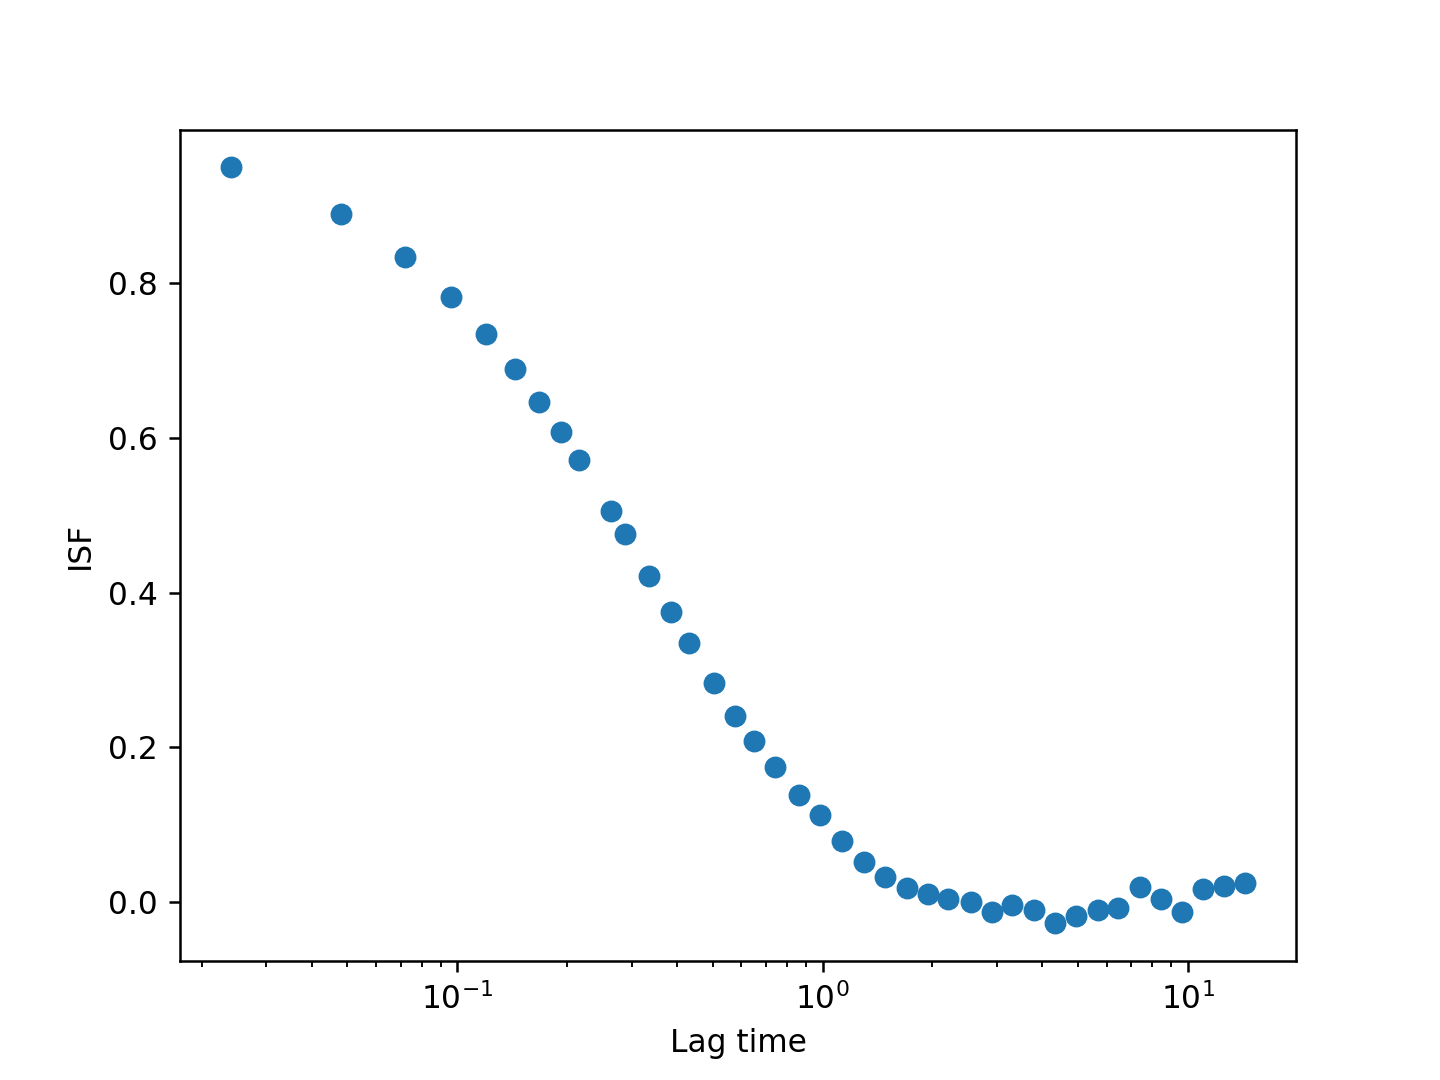

Text(0, 0.5, 'ISF')

In [16]:
#Selecting the 11th q value
ISF_for_given_q = ddm_analysis_dataset.ISF.isel(q=10)
display(ISF_for_given_q)

#A couple ways we could plot
ddm_analysis_dataset.ISF.isel(q=10).plot(xscale='log', marker='o', ls='none')

fig,ax = plt.subplots()
ax.semilogx(ddm_analysis_dataset.lagtime, ddm_analysis_dataset.ISF.isel(q=10), 'o')
ax.set_xlabel("Lag time")
ax.set_ylabel("ISF")

<xarray.DataArray 'ISF' (lagtime: 40)>
array([ 9.497707e-01,  8.896132e-01,  8.343400e-01,  7.827928e-01,
        7.344265e-01,  6.891745e-01,  6.470448e-01,  6.078118e-01,
        5.711476e-01,  5.049806e-01,  4.753026e-01,  4.218078e-01,
        3.750515e-01,  3.345287e-01,  2.831657e-01,  2.408751e-01,
        2.080550e-01,  1.738906e-01,  1.386432e-01,  1.118611e-01,
        7.857336e-02,  5.123148e-02,  3.196419e-02,  1.859042e-02,
        1.062267e-02,  3.212459e-03, -7.781867e-04, -1.256727e-02,
       -3.412066e-03, -1.053542e-02, -2.780657e-02, -1.873607e-02,
       -1.069987e-02, -7.410014e-03,  1.982505e-02,  3.313624e-03,
       -1.324848e-02,  1.653199e-02,  2.024167e-02,  2.408573e-02])
Coordinates:
  * lagtime  (lagtime) float64 0.02398 0.04796 0.07194 ... 11.01 12.59 14.36
    q        float64 2.028

<IPython.core.display.Javascript object>


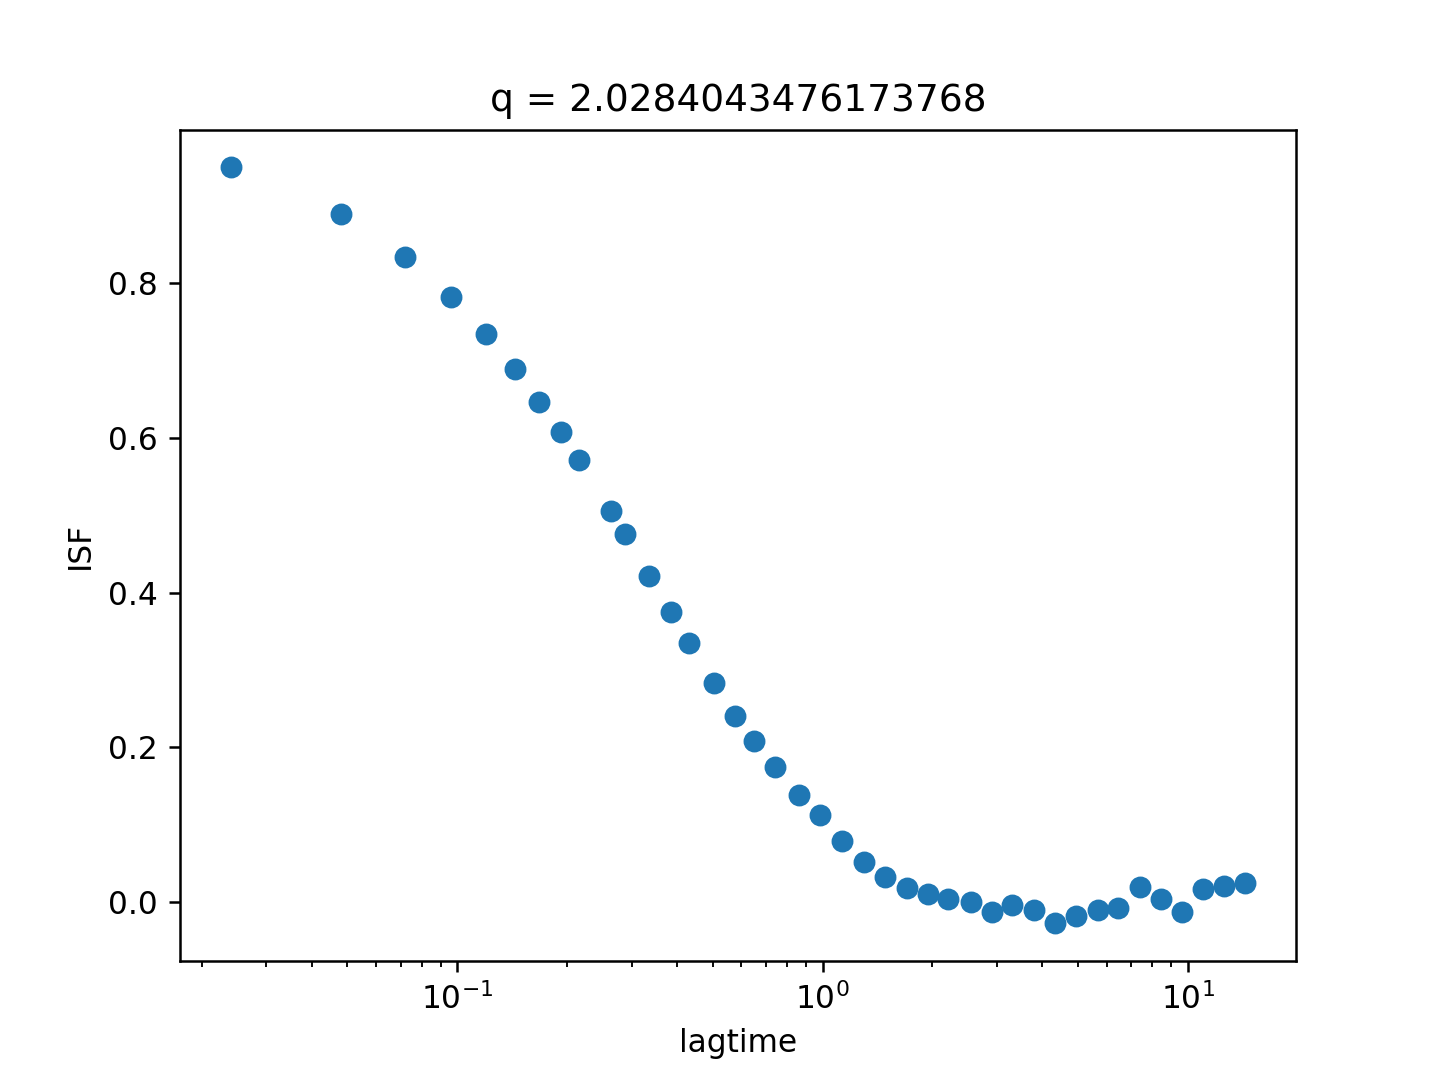

In [17]:
#Selecting the q value closest to 2 um^-1
ISF_for_given_q = ddm_analysis_dataset.ISF.sel(q=2, method='nearest')
display(ISF_for_given_q)

plt.figure()
ddm_analysis_dataset.ISF.sel(q=2, method='nearest').plot(xscale='log', marker='o', ls='none', ax=None)


### Plotting multiple lines

<IPython.core.display.Javascript object>


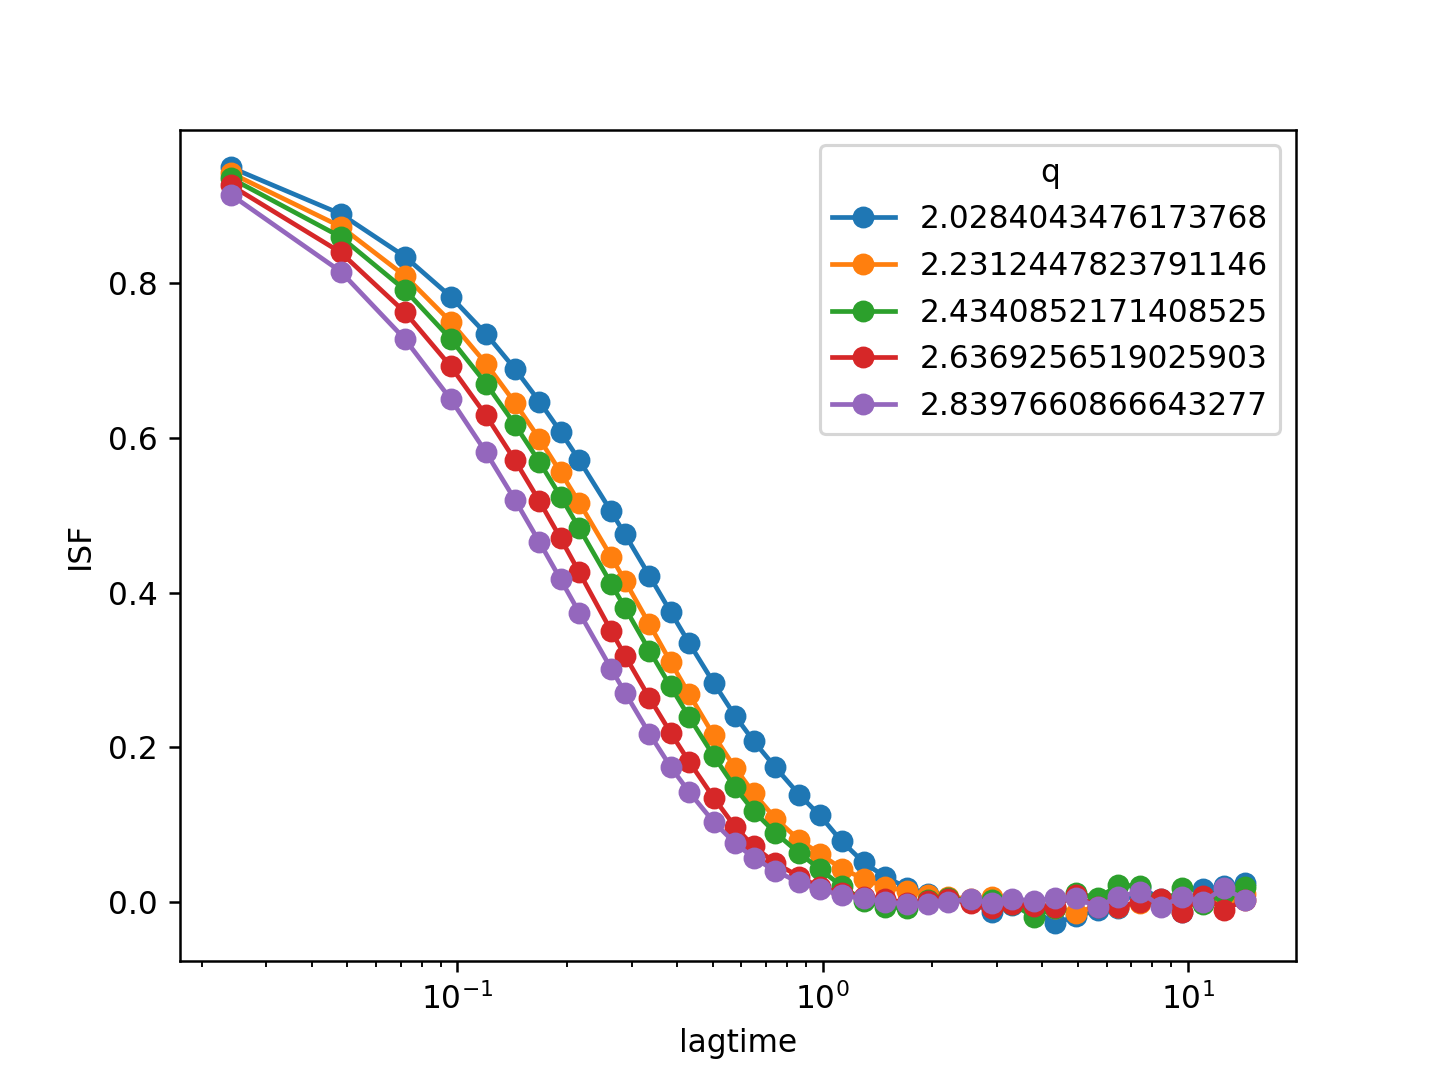

In [19]:
plt.figure()

#Get ISFs for all q values between 2 and 3
ddm_analysis_dataset.ISF.sel(q=slice(2,3)).plot.line(marker='o', ls='-', x='lagtime', xscale='log')

## Working with Pandas

In [20]:
ddm_analysis_dataset.ISF.to_pandas()

q,0.000000,0.202840,0.405681,0.608521,0.811362,1.014202,1.217043,1.419883,1.622723,1.825564,...,10.953383,11.156224,11.359064,11.561905,11.764745,11.967586,12.170426,12.373267,12.576107,12.778947
lagtime,,,,,,,,,,,,,,,,,,,,,
0.023981,0.0,0.999597,0.987191,0.985780,0.985536,0.982698,0.976773,0.972137,0.964843,0.958139,...,0.821593,0.832969,0.824492,0.820816,0.829526,0.812101,0.838544,0.857786,0.822048,0.866042
0.047962,0.0,0.999064,0.970667,0.968271,0.968345,0.961167,0.948616,0.938011,0.921921,0.907073,...,0.746978,0.742594,0.747522,0.732535,0.752115,0.732642,0.761520,0.764972,0.739766,0.786740
0.071942,0.0,0.998664,0.958095,0.954210,0.953103,0.941467,0.922142,0.905808,0.881625,0.859759,...,0.669915,0.687221,0.681239,0.674754,0.670643,0.654057,0.687057,0.702990,0.681077,0.719469
0.095923,0.0,0.998336,0.948190,0.942070,0.939041,0.923041,0.897252,0.875695,0.843525,0.815551,...,0.598998,0.632232,0.625119,0.609974,0.615477,0.587788,0.638557,0.645963,0.603033,0.646724
0.119904,0.0,0.998077,0.939744,0.930982,0.926034,0.905903,0.873651,0.847002,0.807359,0.774218,...,0.562360,0.559338,0.567751,0.574469,0.571487,0.546906,0.561961,0.570082,0.580820,0.596684
0.143885,0.0,0.997844,0.932571,0.921407,0.913817,0.889182,0.851207,0.819973,0.773292,0.735205,...,0.529398,0.543809,0.516521,0.520442,0.532767,0.503260,0.532023,0.513550,0.534642,0.550075
0.167866,0.0,0.997661,0.925917,0.912864,0.902437,0.872669,0.829822,0.793897,0.740572,0.698594,...,0.493254,0.506132,0.499933,0.482452,0.489677,0.465762,0.491084,0.488123,0.495770,0.511831
0.191847,0.0,0.997483,0.919475,0.904865,0.891612,0.856887,0.809060,0.768705,0.709280,0.663699,...,0.464642,0.462226,0.462986,0.448299,0.448370,0.452538,0.458671,0.452127,0.445507,0.478595
0.215827,0.0,0.997326,0.913835,0.897156,0.881330,0.841626,0.789281,0.744358,0.679760,0.630891,...,0.431776,0.451297,0.433756,0.437236,0.435709,0.418484,0.427219,0.433543,0.418769,0.454554


## Renaming Variables

In [21]:
ddm_analysis_dataset.rename_vars({'B':'background'})

<xarray.Dataset>
Dimensions:           (frames: 40, lagtime: 40, q: 64, q_x: 128, q_y: 128, x: 128, y: 128)
Coordinates:
  * lagtime           (lagtime) float64 0.02398 0.04796 0.07194 ... 12.59 14.36
    framelag          (frames) int32 ...
  * q_y               (q_y) float64 -12.98 -12.78 -12.58 ... 12.37 12.58 12.78
  * q_x               (q_x) float64 -12.98 -12.78 -12.58 ... 12.37 12.58 12.78
  * q                 (q) float64 0.0 0.2028 0.4057 0.6085 ... 12.37 12.58 12.78
  * y                 (y) int32 0 1 2 3 4 5 6 7 ... 121 122 123 124 125 126 127
  * x                 (x) int32 0 1 2 3 4 5 6 7 ... 121 122 123 124 125 126 127
Dimensions without coordinates: frames
Data variables:
    ddm_matrix_full   (lagtime, q_y, q_x) float64 ...
    ddm_matrix        (lagtime, q) float64 ...
    first_image       (y, x) float64 ...
    avg_image_ft      (q) float64 ...
    background        int32 ...
    B_std             float64 ...
    num_pairs_per_dt  (lagtime) int32 ...
    Amplitude         (q) float64 ...
    ISF               (lagtime, q) float64 0.0 0.9996 0.9872 ... 0.1659 0.1911
Attributes:
    units:                   Intensity
    lagtime:                 sec
    q:                       μm$^{-1}$
    x:                       pixels
    y:                       pixels
    info:                    ddm_matrix is the averages of FFT difference ima...
    DataDirectory:           C:/Users/Ryan/Documents/GitHub/PyDDM/Examples/
    FileName:                images_nobin_40x_128x128_8bit.tif
    pixel_size:              0.242
    frame_rate:              41.7
    starting_frame_number:   no
    ending_frame_number:     no
    number_lagtimes:         40
    first_lag_time:          yes
    last_lag_time:           600
    crop_to_roi:             no
    split_into_4_rois:       no
    use_windowing_function:  no
    binning:                 no
    bin_size:                2
    central_angle:           no
    angle_range:             no

## Selecting subset of the DDM matrix / ISF using `where` function

In [24]:
#Returns dataset where the condition in the `where` statement is true.
#If `drop = False`, then the data where the condition is false are not dropped
#but are instead set to `nan`
ddm_analysis_dataset.where(ddm_analysis_dataset.lagtime < 9.64, drop=True)

<xarray.Dataset>
Dimensions:           (frames: 40, lagtime: 36, q: 64, q_x: 128, q_y: 128, x: 128, y: 128)
Coordinates:
  * lagtime           (lagtime) float64 0.02398 0.04796 0.07194 ... 7.386 8.441
    framelag          (frames) int32 1 2 3 4 5 6 7 ... 308 352 402 459 525 599
  * q_y               (q_y) float64 -12.98 -12.78 -12.58 ... 12.37 12.58 12.78
  * q_x               (q_x) float64 -12.98 -12.78 -12.58 ... 12.37 12.58 12.78
  * q                 (q) float64 0.0 0.2028 0.4057 0.6085 ... 12.37 12.58 12.78
  * y                 (y) int32 0 1 2 3 4 5 6 7 ... 121 122 123 124 125 126 127
  * x                 (x) int32 0 1 2 3 4 5 6 7 ... 121 122 123 124 125 126 127
Dimensions without coordinates: frames
Data variables:
    ddm_matrix_full   (lagtime, q_y, q_x) float64 194.5 183.5 ... 191.7 182.2
    ddm_matrix        (lagtime, q) float64 0.0 294.2 321.4 ... 207.1 206.2 206.9
    first_image       (y, x, lagtime) float64 128.0 128.0 128.0 ... 215.0 215.0
    avg_image_ft      (q, lagtime) float64 0.0 0.0 0.0 0.0 ... 105.3 105.3 105.3
    B                 (lagtime) float64 190.0 190.0 190.0 ... 190.0 190.0 190.0
    B_std             (lagtime) float64 1.491 1.491 1.491 ... 1.491 1.491 1.491
    num_pairs_per_dt  (lagtime) float64 2.999e+03 2.998e+03 ... 2.648e+03
    Amplitude         (q, lagtime) float64 -190.0 -190.0 -190.0 ... 20.65 20.65
    ISF               (lagtime, q) float64 0.0 0.9996 0.9872 ... 0.1688 0.182
Attributes:
    units:                   Intensity
    lagtime:                 sec
    q:                       μm$^{-1}$
    x:                       pixels
    y:                       pixels
    info:                    ddm_matrix is the averages of FFT difference ima...
    DataDirectory:           C:/Users/Ryan/Documents/GitHub/PyDDM/Examples/
    FileName:                images_nobin_40x_128x128_8bit.tif
    pixel_size:              0.242
    frame_rate:              41.7
    starting_frame_number:   no
    ending_frame_number:     no
    number_lagtimes:         40
    first_lag_time:          yes
    last_lag_time:           600
    crop_to_roi:             no
    split_into_4_rois:       no
    use_windowing_function:  no
    binning:                 no
    bin_size:                2
    central_angle:           no
    angle_range:             no

## Performing fit...

In [12]:
reload(ddm)

<module 'ddm_analysis_and_fitting' from '../PyDDM\\ddm_analysis_and_fitting.py'>

In [13]:
path_to_yaml = "C:/Users/Ryan/Documents/GitHub/DDM-at-USD/Class-based framework/"
yaml_filenm = "example_data.yml"
ddm_fits = ddm.DDM_Fit(path_to_yaml + yaml_filenm)

,Initial guess,Minimum,Maximum
Amplitude,100.0,1.000,1000000.0
Tau,1.0,0.001,10.0
Background,25000.0,0.000,10000000.0
StretchingExp,1.0,0.500,1.1


Loading file C:/Users/Ryan/Documents/GitHub/DDM-at-USD/ExampleData/images_nobin_40x_128x128_8bit_ddmmatrix.nc ...


In [14]:
fit01 = ddm_fits.fit('fit01', display_table=False)

In function 'get_tau_vs_q_fit', using new tau...
Under what name would you want to save the generated fit in the dictionary 'fittings': fit01
Fit is saved in fittings dictionary with key 'fit01'.


In [6]:
fit01.velocity

array(1.31293097)

In [17]:
del(fit01.attrs['pixel_size'])

In [18]:
ddm.save_fit_results_to_excel(fit01, file_name_end='testing')

In function 'get_tau_vs_q_fit', using new tau...
In hf.plot_one_tau_vs_q function, using new tau... 


<xarray.Dataset>
Dimensions:          (parameter: 4, q: 64, lagtime: 40)
Coordinates:
  * parameter        (parameter) <U13 'Amplitude' 'Tau' ... 'StretchingExp'
  * q                (q) float64 0.0 0.2028 0.4057 0.6085 ... 12.37 12.58 12.78
  * lagtime          (lagtime) float64 0.02398 0.04796 0.07194 ... 12.59 14.39
Data variables:
    parameters       (parameter, q) float64 1.0 5.011e+03 ... 0.9071 0.9847
    theory           (lagtime, q) float64 0.001311 364.5 349.5 ... 206.3 206.4
    isf_data         (lagtime, q) float64 ...
    ddm_matrix_data  (lagtime, q) float64 ...
    A                (q) float64 -212.9 2.585e+05 1.024e+04 ... -3.434 -2.255
    B                float64 212.9
Attributes:
    model:                          DDM Matrix - Single Exponential
    data_to_use:                    DDM Matrix
    initial_params_dict:            ["{'n': 0, 'value': 100.0, 'limits': [1.0...
    effective_diffusion_coeff:      0.6241214765261827
    tau_vs_q_slope:                 [-1.9357304]
    msd_alpha:                      [1.03320173]
    msd_effective_diffusion_coeff:  [0.614429]
    diffusion_coeff:                0.600673588151076
    diffusion_coeff_std:            0.041020075785940815
    velocity:                       1.205885034971004
    velocity_std:                   0.4808141805169979
    good_q_range:                   [4, 19]

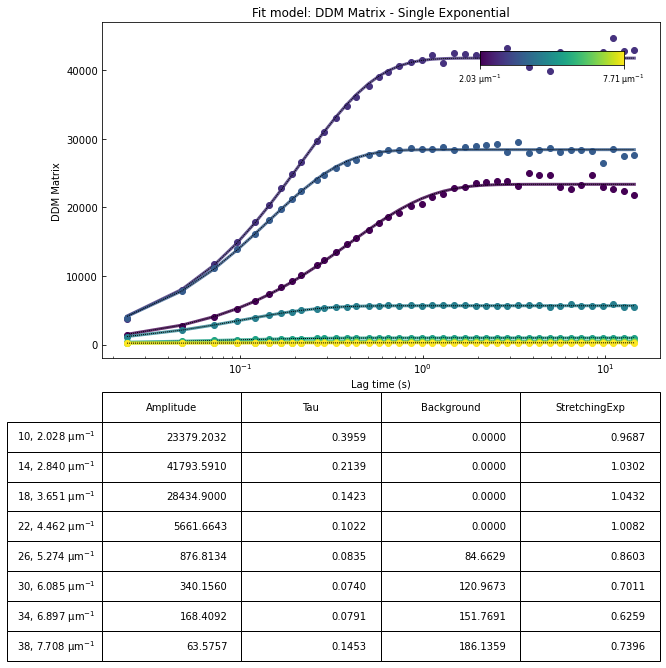

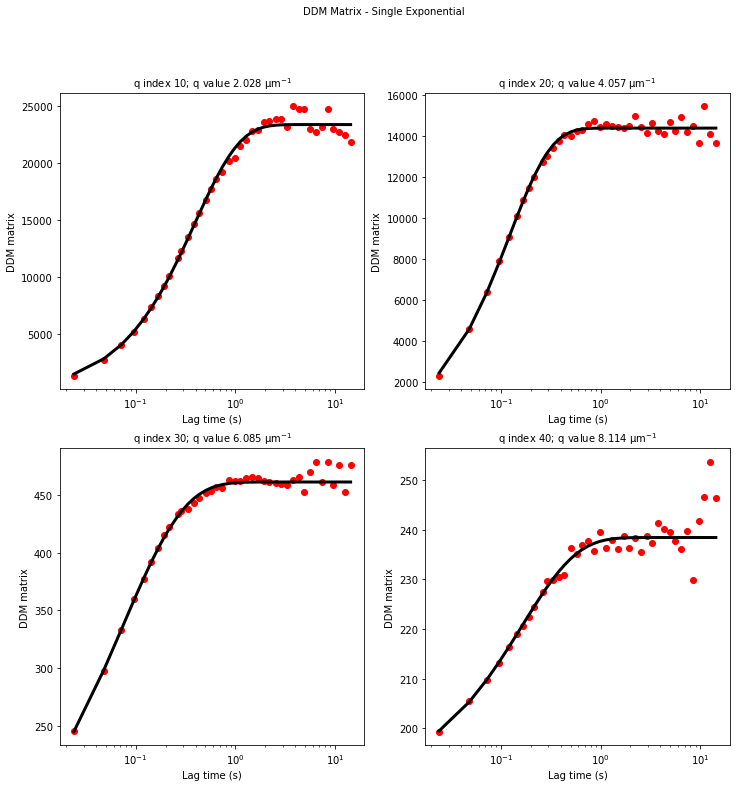

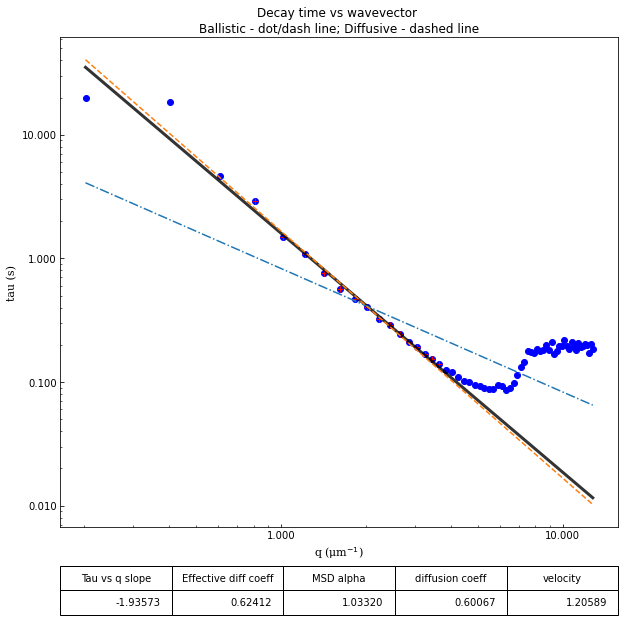

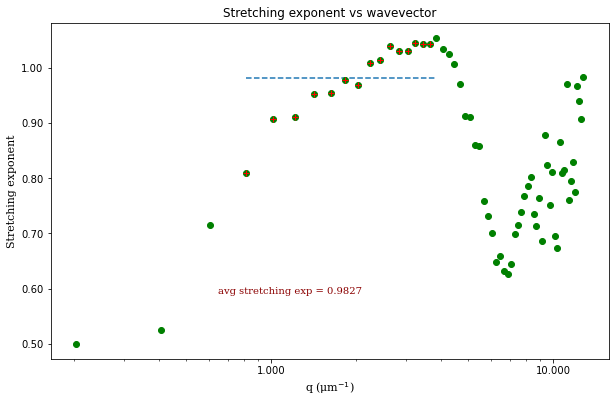

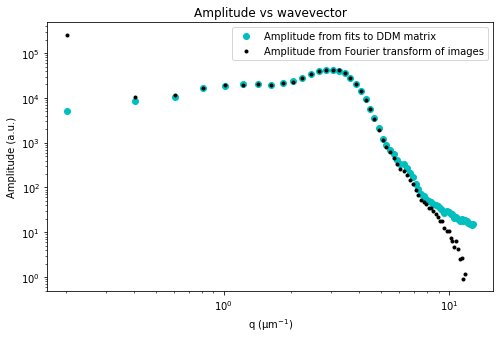

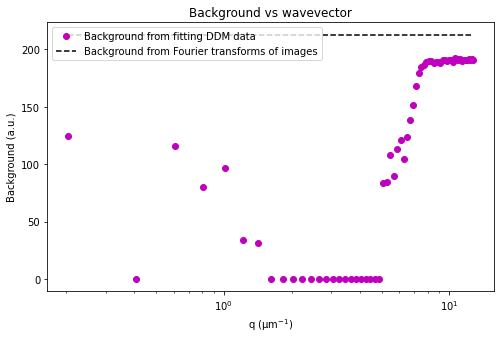

In [4]:
%matplotlib inline
ddm_fits.generate_fit_report(fit_results = 'fit01')

In [32]:
ddm_fits.save_fits_disk('fit03', save_directory="./", file_type='netcdf', fit_fname_end = 'testing')

The key fit03 was not found in self.fittings.
Available keys are:  ['fit01']


In [55]:
'isf_data' in fit01.data_vars

True

In [61]:
fit01

<xarray.Dataset>
Dimensions:          (parameter: 4, q: 64, lagtime: 40)
Coordinates:
  * parameter        (parameter) <U13 'Amplitude' 'Tau' ... 'StretchingExp'
  * q                (q) float64 0.0 0.2028 0.4057 0.6085 ... 12.37 12.58 12.78
  * lagtime          (lagtime) float64 0.02398 0.04796 0.07194 ... 12.59 14.39
Data variables:
    parameters       (parameter, q) float64 1.0 5.011e+03 ... 0.9071 0.9847
    theory           (lagtime, q) float64 0.001311 364.5 349.5 ... 206.3 206.4
    isf_data         (lagtime, q) float64 0.0 0.9997 0.9894 ... -2.397 -2.196
    ddm_matrix_data  (lagtime, q) float64 0.0 294.2 321.4 ... 209.4 201.2 205.7
    A                (q) float64 -212.9 2.585e+05 1.024e+04 ... -3.434 -2.255
    B                float64 212.9
Attributes:
    model:                          DDM Matrix - Single Exponential
    data_to_use:                    DDM Matrix
    initial_params_dict:            ["{'n': 0, 'value': 100.0, 'limits': [1.0...
    effective_diffusion_coeff:      0.6241214765261827
    tau_vs_q_slope:                 [-1.9357304]
    msd_alpha:                      [1.03320173]
    msd_effective_diffusion_coeff:  [0.614429]
    diffusion_coeff:                0.600673588151076
    diffusion_coeff_std:            0.041020075785940815
    velocity:                       1.205885034971004
    velocity_std:                   0.4808141805169979
    good_q_range:                   [4, 19]

I want to open two analysis files and average together the DDM matrices (or radial averages). 

In [2]:
data_path = "Y:\\Ryan McGorty\\2021-11-12_SilicaRods60x\\images_2\\"
data_file_1 = "ddm_matrix_images_2_gradientsquaredX.nc"
data_file_2 = "ddm_matrix_images_2_gradientsquaredY.nc"

data1 = xr.open_dataset(data_path+data_file_1)
data2 = xr.open_dataset(data_path+data_file_2)

In [3]:
data1

<xarray.Dataset>
Dimensions:         (time: 200, q_y: 256, q_x: 256, q: 128)
Coordinates:
  * time            (time) float64 0.01241 0.02481 0.03722 ... 58.41 60.2 62.03
    framelag        (time) int32 ...
  * q_y             (q_y) float64 -14.54 -14.43 -14.32 ... 14.2 14.32 14.43
  * q_x             (q_x) float64 -14.54 -14.43 -14.32 ... 14.2 14.32 14.43
  * q               (q) float64 0.0 0.1136 0.2273 0.3409 ... 14.2 14.32 14.43
Data variables:
    ddm_matrix      (time, q_y, q_x) float64 ...
    ravs            (time, q) float64 ...
    av_fft_offrame  (q) float64 ...
    B               float64 ...
    B_std           float64 ...
    Amplitude       (q) float64 ...
    ISF             (time, q) float64 ...
Attributes: (12/18)
    units:                   Intensity
    time:                    sec or frame number
    q:                       μm$^-$$^1$
    info:                    ddm_matrix is the averages of FFT difference ima...
    DataDirectory:           C:/Users/svc-scst255lab/Documents/Ryan/2021-11-1...
    FileName:                images_2_gradientsquaredX.tif
    ...                      ...
    last_lag_time:           5000
    crop_to_roi:             no
    split_into_4_rois:       no
    use_windowing_function:  no
    binning:                 no
    bin_size:                2

In [53]:
combo = data1.copy()

In [54]:
combo['ravs'] = 0.5*(data1.ravs + data2.ravs)

In [61]:
combo['Amplitude'] = 0.5*(data1.Amplitude + data2.Amplitude)

In [63]:
combo['B'] = 0.5*(data1.B + data2.B)

In [64]:
combo['ISF'] = 0.5*(data1.ISF + data2.ISF)

<IPython.core.display.Javascript object>


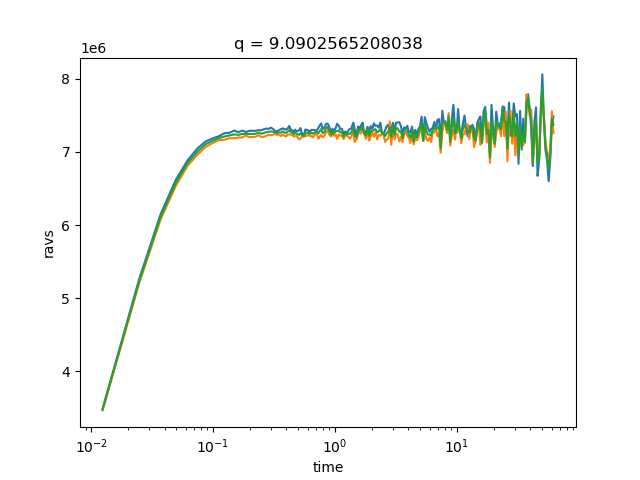

[]

In [56]:
qval = 80
data1.ravs.isel(q=qval).plot()
data2.ravs.isel(q=qval).plot()
combo.ravs.isel(q=qval).plot()
plt.semilogx()

In [57]:
combo.attrs['FileName'] = "%s and %s" % (data1.FileName, data2.FileName)

In [58]:
combo

<xarray.Dataset>
Dimensions:         (time: 200, q_y: 256, q_x: 256, q: 128)
Coordinates:
  * time            (time) float64 0.01241 0.02481 0.03722 ... 58.41 60.2 62.03
    framelag        (time) int32 1 2 3 4 5 6 7 ... 4303 4434 4569 4708 4852 5000
  * q_y             (q_y) float64 -14.54 -14.43 -14.32 ... 14.2 14.32 14.43
  * q_x             (q_x) float64 -14.54 -14.43 -14.32 ... 14.2 14.32 14.43
  * q               (q) float64 0.0 0.1136 0.2273 0.3409 ... 14.2 14.32 14.43
Data variables:
    ddm_matrix      (time, q_y, q_x) float64 ...
    ravs            (time, q) float64 6.164e+06 6.148e+06 ... 7.544e+06
    av_fft_offrame  (q) float64 4.379e+10 6.57e+07 ... 3.845e+06 3.707e+06
    B               float64 7.681e+06
    B_std           float64 9.631e+04
    Amplitude       (q) float64 8.758e+10 1.237e+08 ... 8.594e+03 -2.662e+05
    ISF             (time, q) float64 1.0 1.013 1.013 ... 3.681 -27.64 0.3207
Attributes: (12/18)
    units:                   Intensity
    time:                    sec or frame number
    q:                       μm$^-$$^1$
    info:                    ddm_matrix is the averages of FFT difference ima...
    DataDirectory:           C:/Users/svc-scst255lab/Documents/Ryan/2021-11-1...
    FileName:                images_2_gradientsquaredX.tif and images_2_gradi...
    ...                      ...
    last_lag_time:           5000
    crop_to_roi:             no
    split_into_4_rois:       no
    use_windowing_function:  no
    binning:                 no
    bin_size:                2

In [65]:
combo.to_netcdf(data_path + "ddm_matrix_images_2_gradientsquaredXY.nc")

In [66]:
combo.close()